In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
import math

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("winequality-red.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.isnull().sum()  ## checking for missing data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Eploratory Data Analysis

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


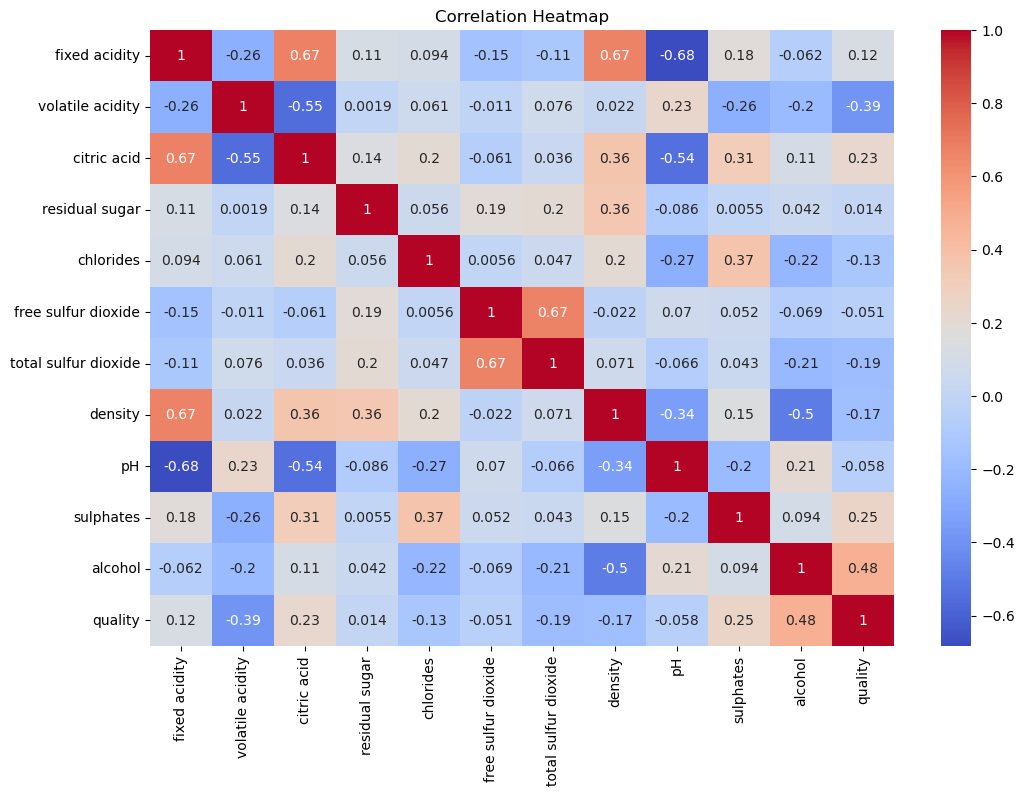

In [8]:
# Correlation with target
corr_quality = data.corr()['quality'].sort_values(ascending=False)
print(corr_quality)

# Heatmap of all correlations
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

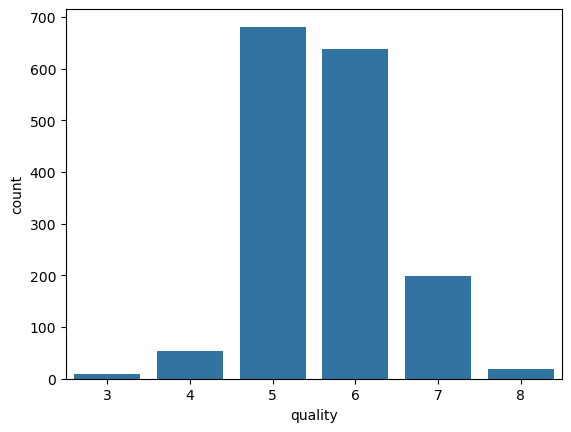

In [9]:
# countplot showing quality distribution

sns.countplot(x='quality', data=data)
plt.show()

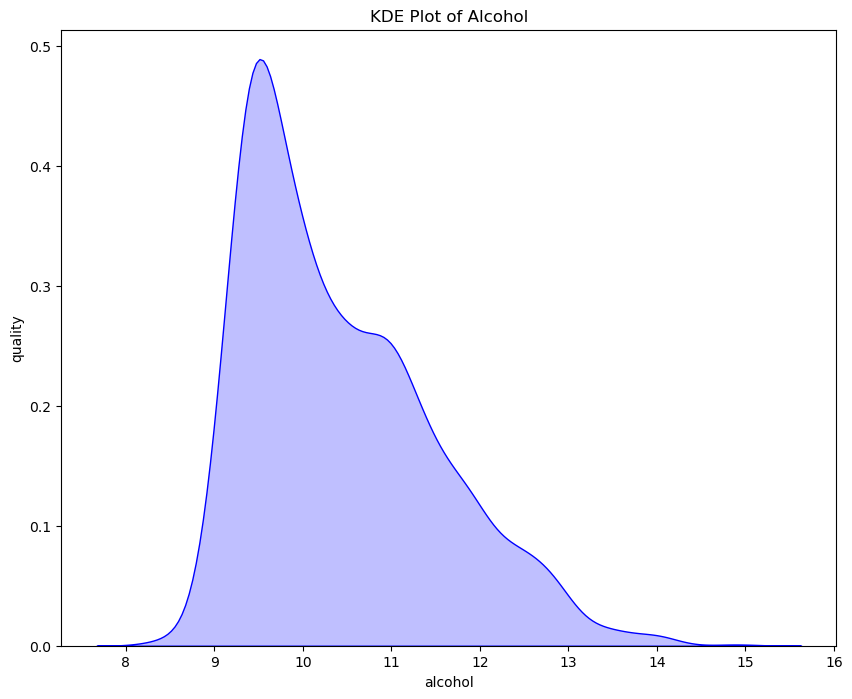

In [10]:
## relationship between alcohol and quality
# This is showing the skewness of the relationship between alcohol and quality

plt.figure(figsize=(10, 8))
sns.kdeplot(data['alcohol'], color='blue', fill=True)
plt.title('KDE Plot of Alcohol')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

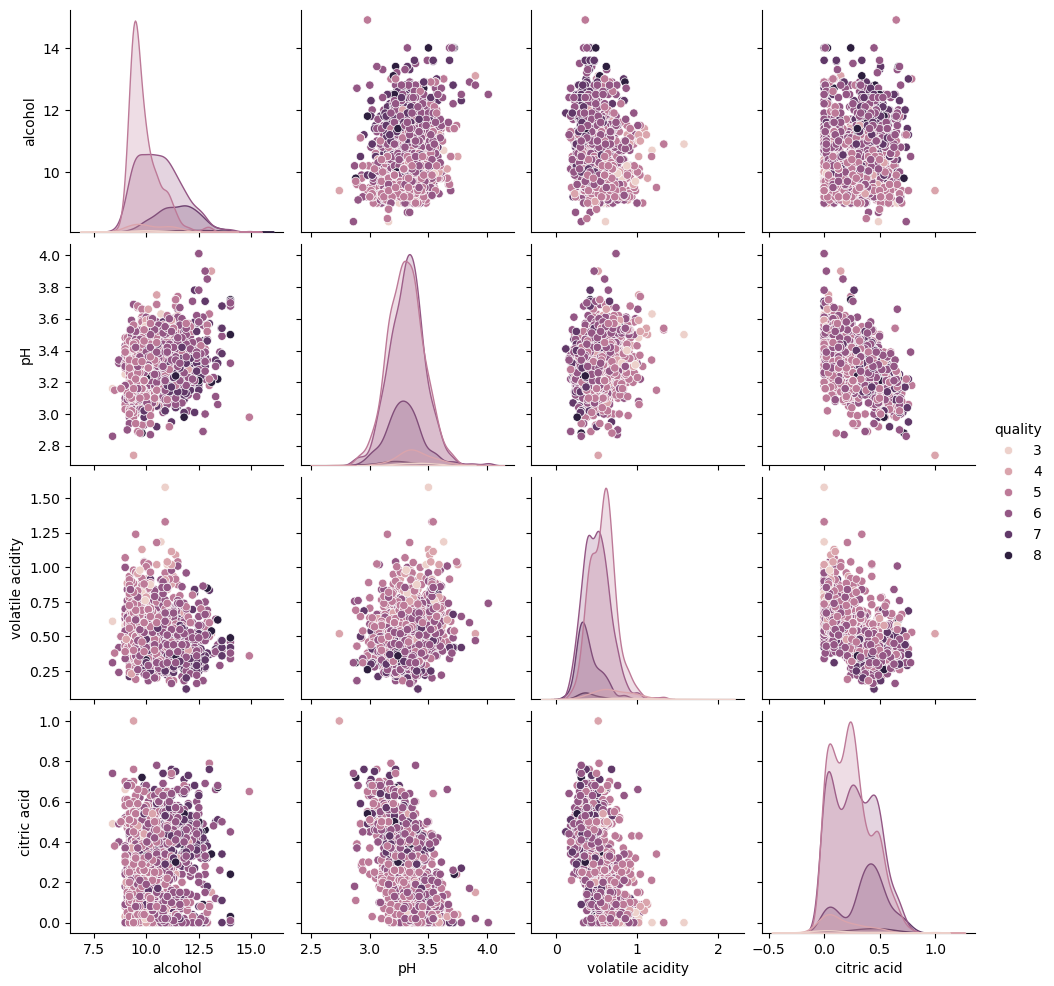

In [11]:
sns.pairplot(data, hue='quality', vars=['alcohol', 'pH', 'volatile acidity', 'citric acid'])
plt.show()

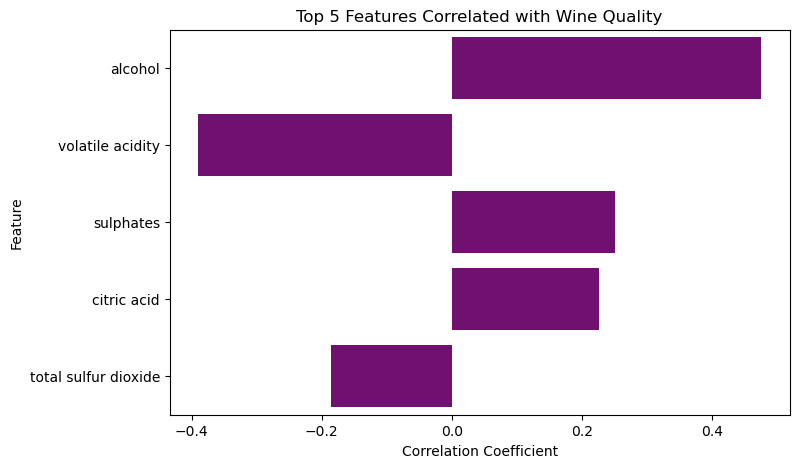

In [12]:
# This shows relationship between top 5 features with quality
corr_with_quality = data.corr()['quality'].drop('quality')

#Pick top 5 features by absolute correlation
top5_features = corr_with_quality.abs().sort_values(ascending=False).head(5).index

top5_corr_values = corr_with_quality[top5_features]
plt.figure(figsize=(8,5))
sns.barplot(
    x=top5_corr_values.values, 
    y=top5_corr_values.index, 
    color='purple'
)
plt.title("Top 5 Features Correlated with Wine Quality")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

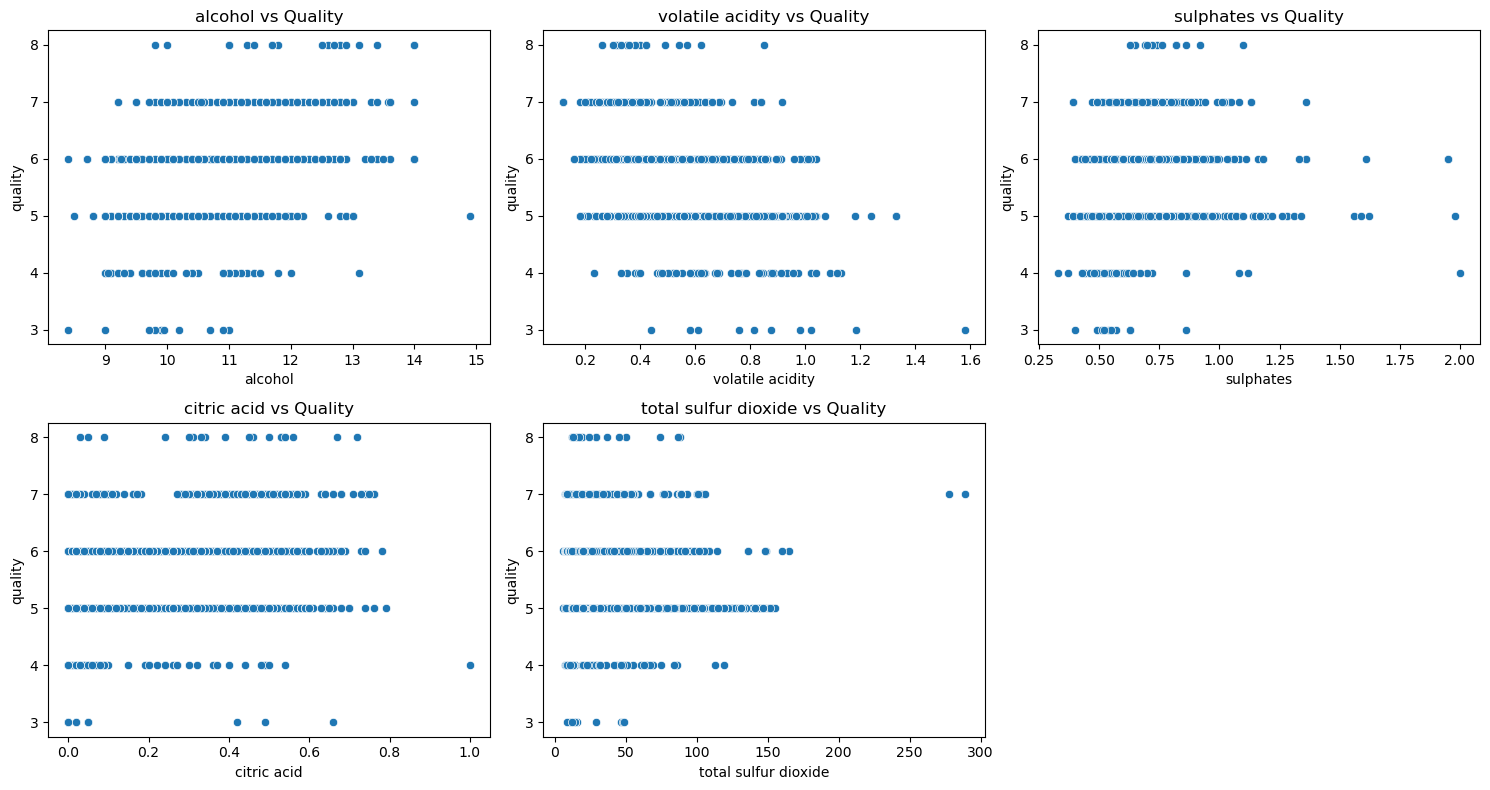

In [13]:
# correlation showing relationship per top 5 feature
plt.figure(figsize=(15,8))
for i, f in enumerate(top5_features):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=f, y='quality', data=data)
    plt.title(f'{f} vs Quality')
plt.tight_layout()
plt.show()


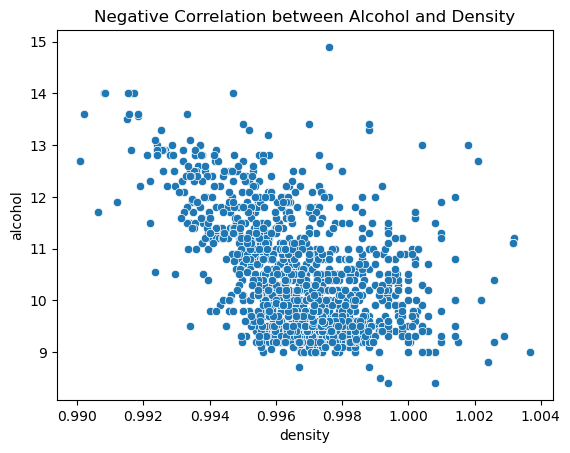

In [14]:
## negative correlation between residual sugar and alcohol

sns.scatterplot(x='density', y='alcohol', data=data)
plt.title("Negative Correlation between Alcohol and Density")
plt.show()

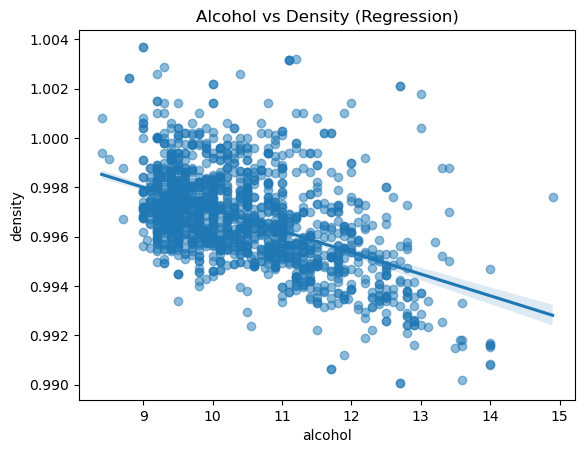

In [15]:
sns.regplot(x='alcohol', y='density', data=data, scatter_kws={'alpha':0.5})
plt.title("Alcohol vs Density (Regression)")
plt.show()

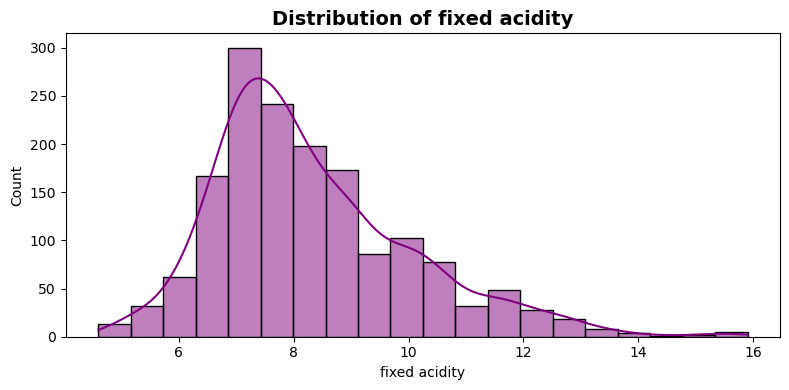

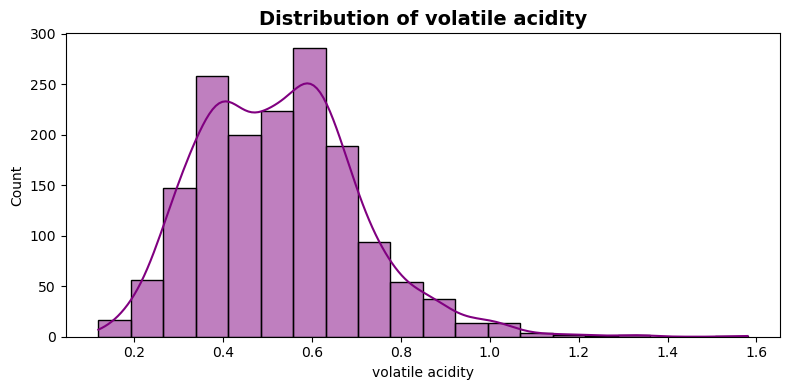

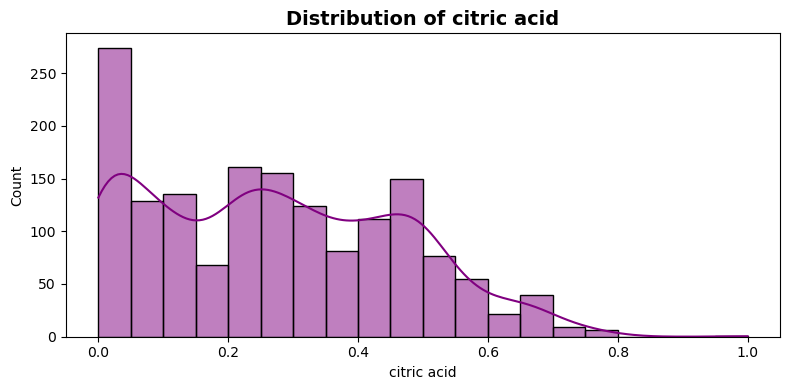

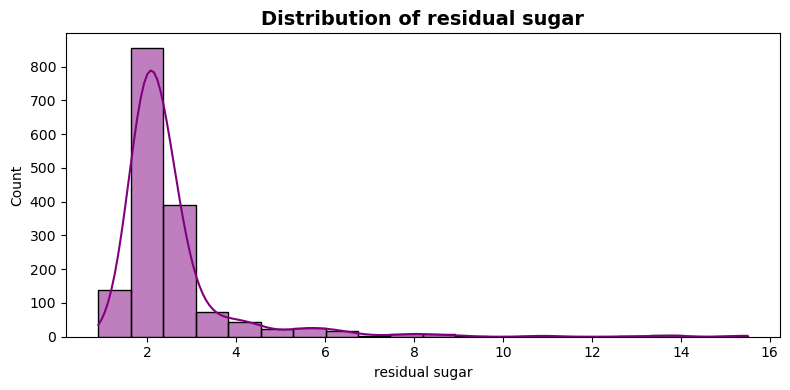

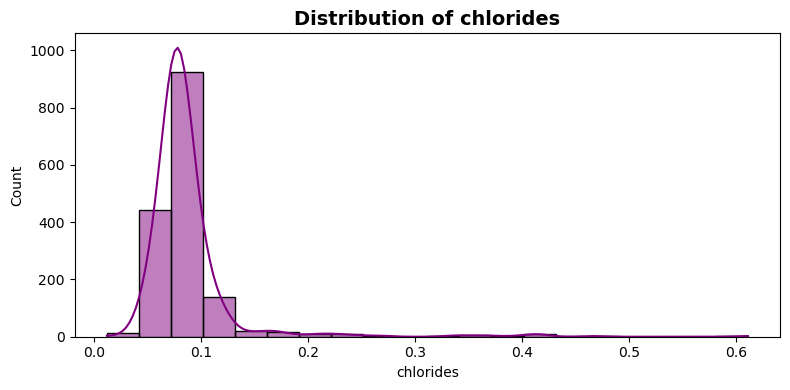

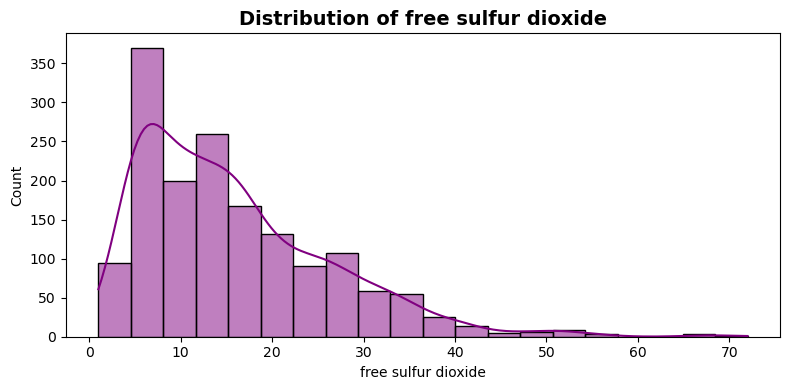

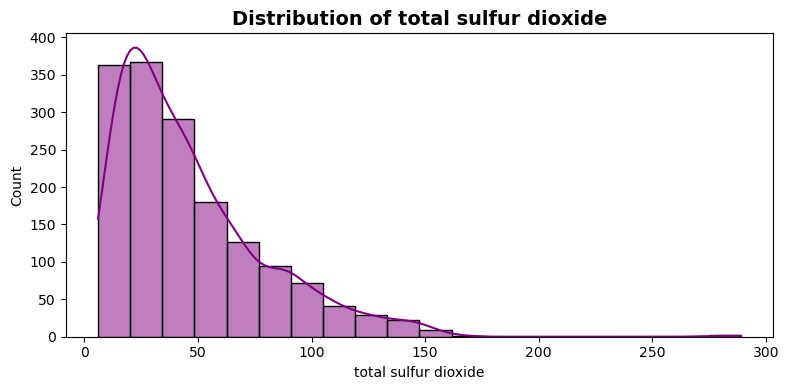

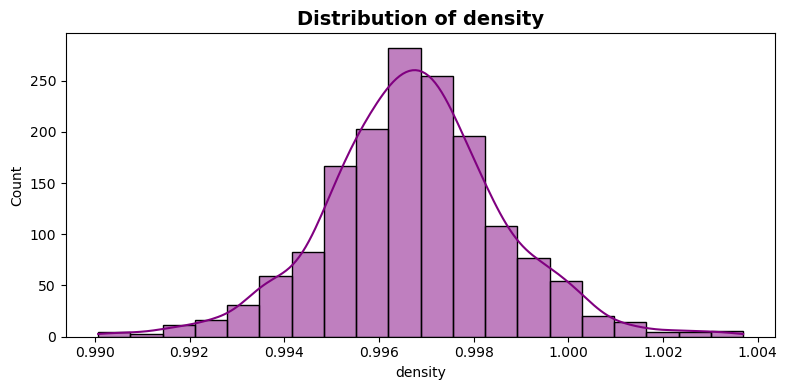

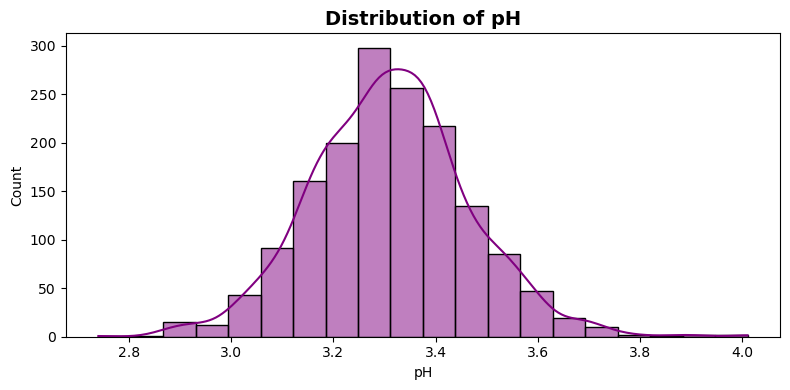

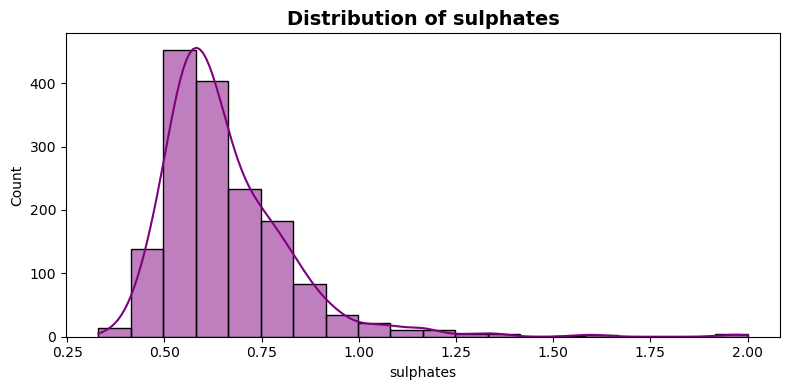

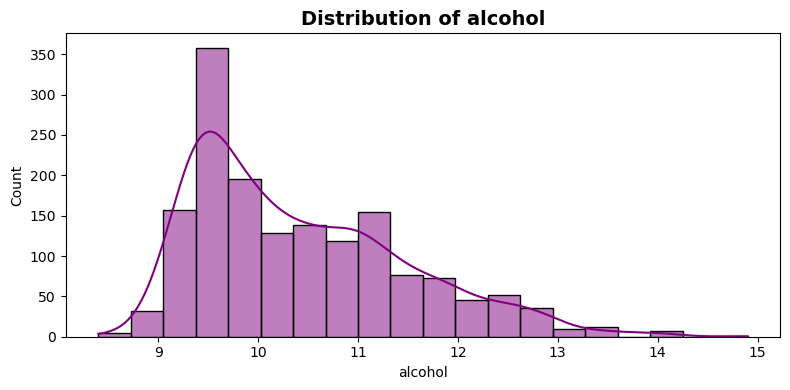

In [16]:
for col in data.columns[:-1]:
    plt.figure(figsize=(8, 4))
    ax = sns.histplot(data=data, x=col, kde=True, bins=20, color='purple')
    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.xticks(rotation=None)
    plt.tight_layout()
    plt.show()

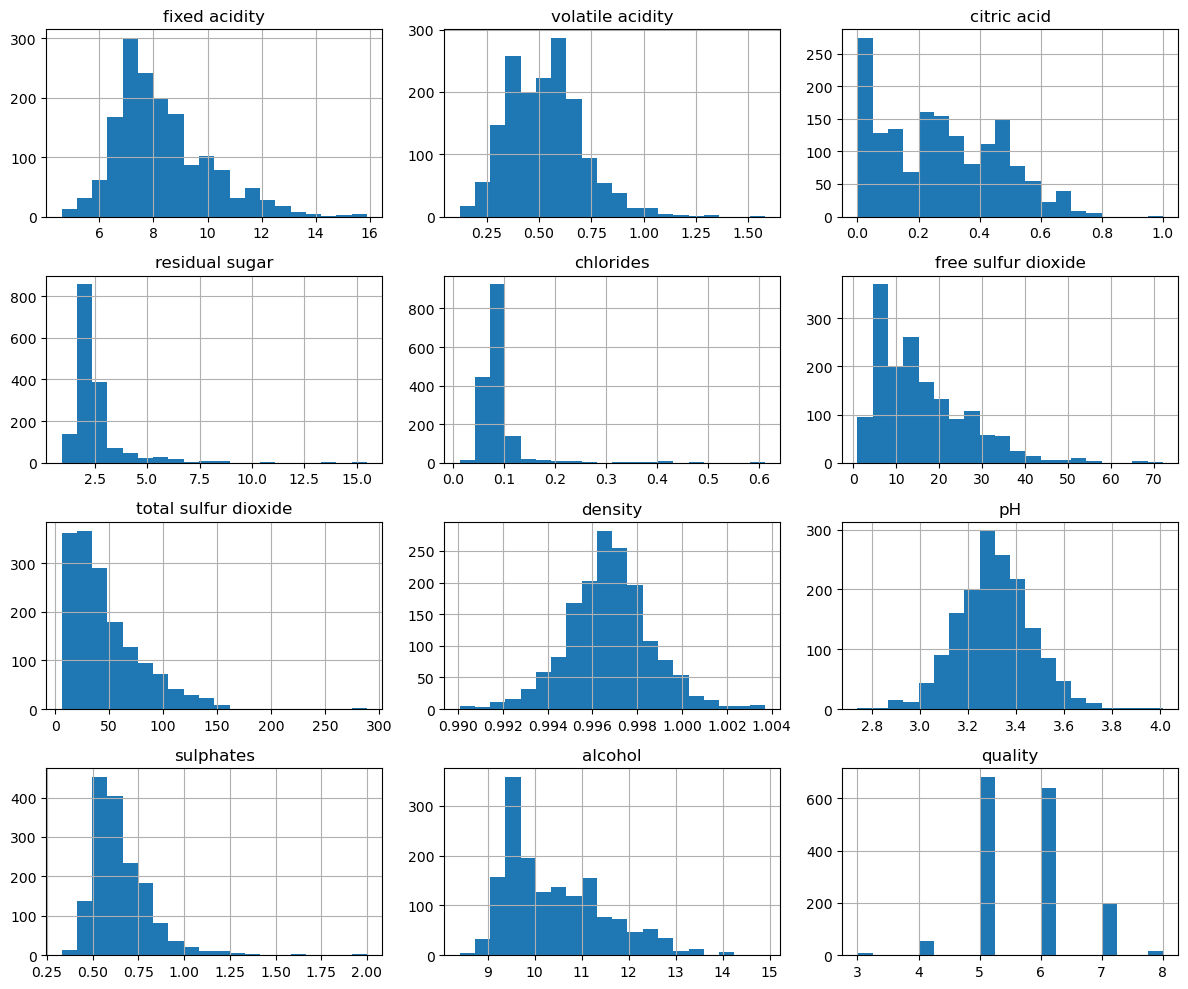

In [17]:

data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

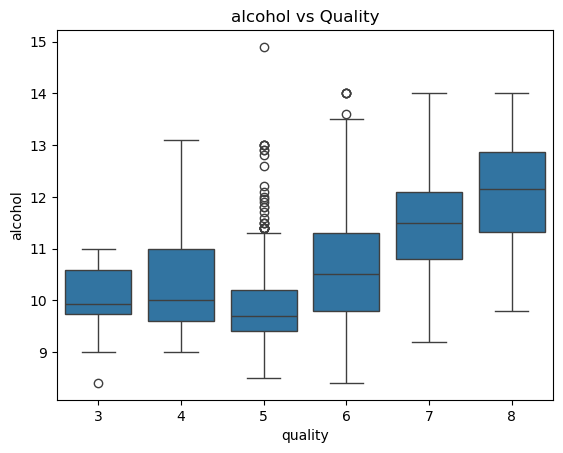

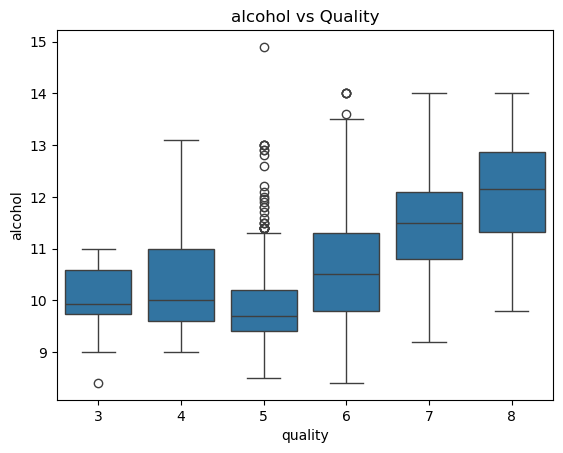

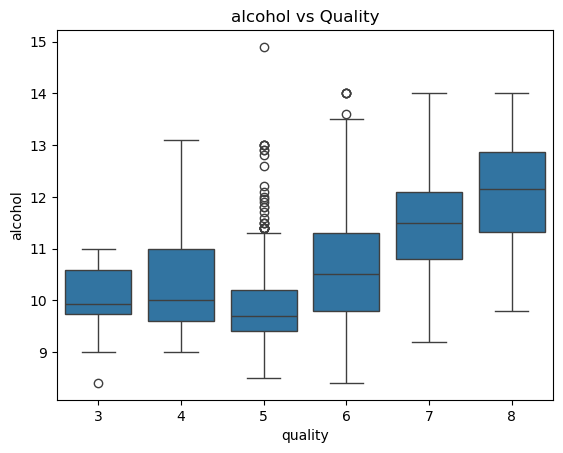

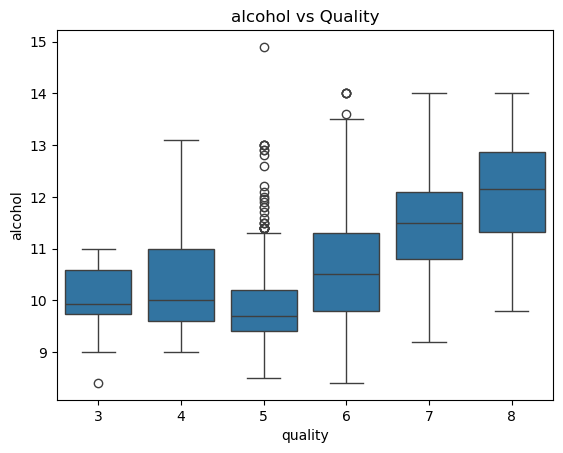

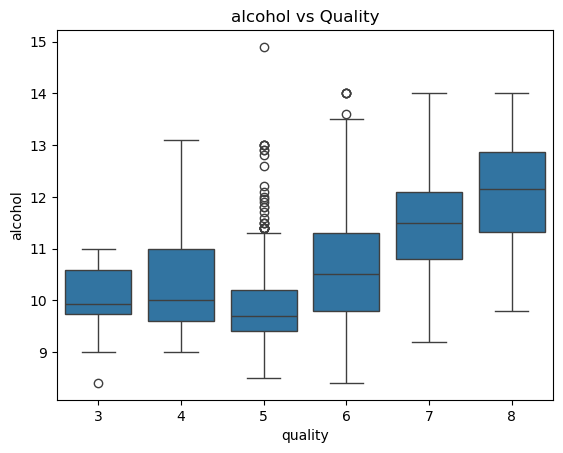

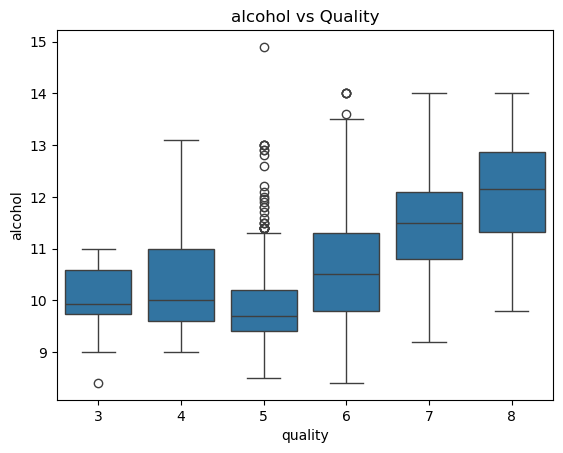

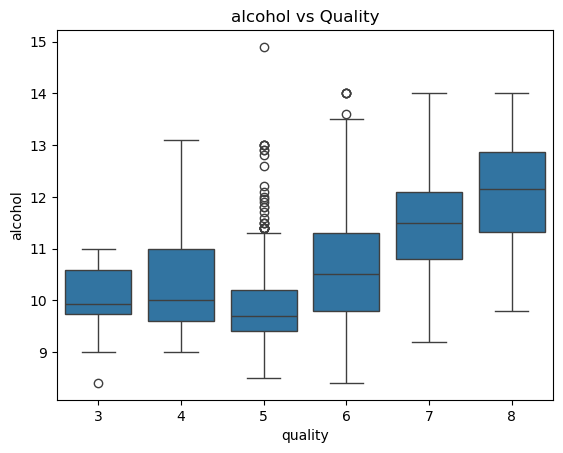

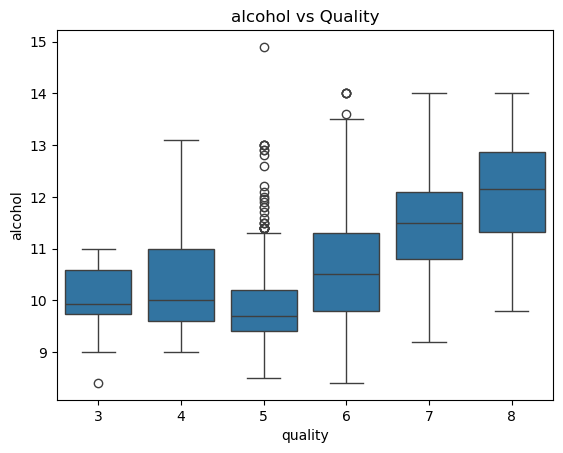

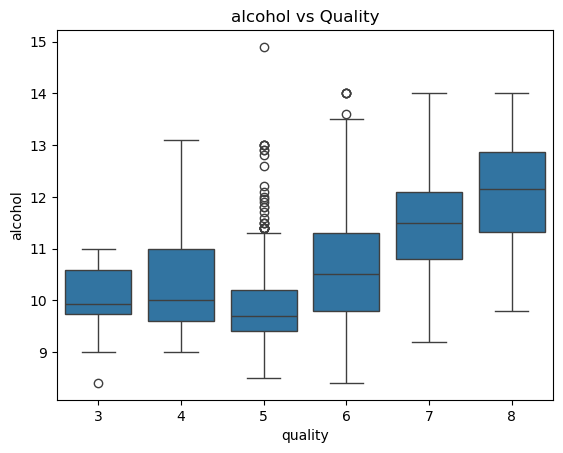

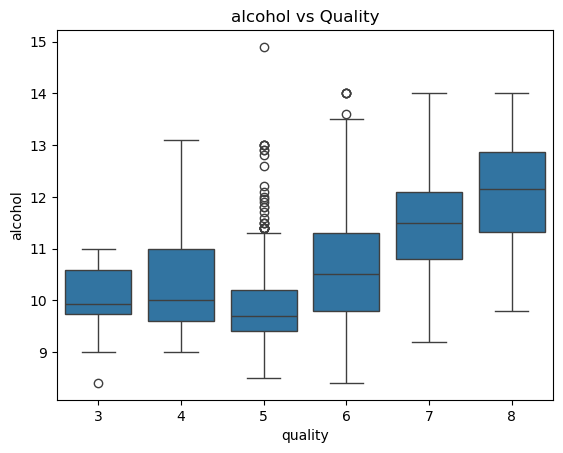

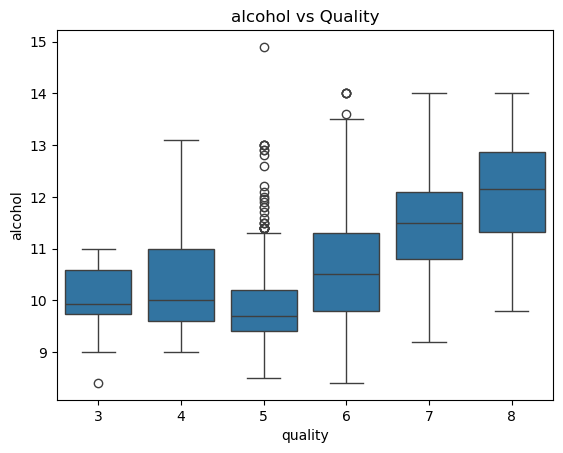

In [18]:

## Checking for outliers

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for f in features:
    sns.boxplot(x='quality', y=col, data=data)
    plt.title(f'{col} vs Quality')
    plt.show()


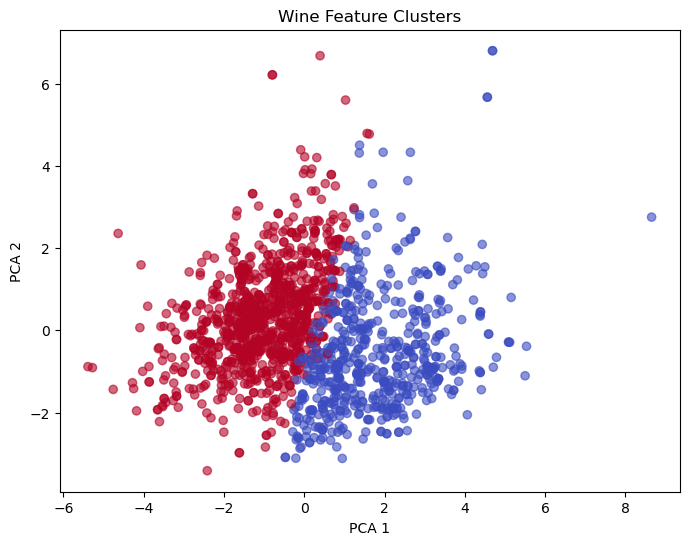

In [19]:
## using KNN to check nearest correlation

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Scale features
X_scaled = StandardScaler().fit_transform(data.drop(['quality'], axis=1))

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Wine Feature Clusters')
plt.show()


In [20]:
data_numeric = data.astype(int)

In [21]:
## removing outliers

Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)

outliers_threshold = 1.5
EQR = Q3 - Q1

outliers = (data_numeric < (Q1 - outliers_threshold * EQR))|(data_numeric > (Q3 + outliers_threshold * EQR))

outliersRemoved = data_numeric[~outliers]
print('original data')
print(data_numeric)

original data
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0                 7                 0            0               1          0   
1                 7                 0            0               2          0   
2                 7                 0            0               2          0   
3                11                 0            0               1          0   
4                 7                 0            0               1          0   
...             ...               ...          ...             ...        ...   
1594              6                 0            0               2          0   
1595              5                 0            0               2          0   
1596              6                 0            0               2          0   
1597              5                 0            0               2          0   
1598              6                 0            0               3          0   

      free su

In [22]:
outliersRemoved

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.0,0.0,1.0,0,11.0,34.0,0.0,3.0,0.0,9,5.0
1,7.0,0.0,0.0,2.0,0,25.0,67.0,0.0,3.0,0.0,9,5.0
2,7.0,0.0,0.0,2.0,0,15.0,54.0,0.0,3.0,0.0,9,5.0
3,11.0,0.0,0.0,1.0,0,17.0,60.0,0.0,3.0,0.0,9,6.0
4,7.0,0.0,0.0,1.0,0,11.0,34.0,0.0,3.0,0.0,9,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.0,0.0,0.0,2.0,0,32.0,44.0,0.0,3.0,0.0,10,5.0
1595,5.0,0.0,0.0,2.0,0,39.0,51.0,0.0,3.0,0.0,11,6.0
1596,6.0,0.0,0.0,2.0,0,29.0,40.0,0.0,3.0,0.0,11,6.0
1597,5.0,0.0,0.0,2.0,0,32.0,44.0,0.0,3.0,0.0,10,5.0


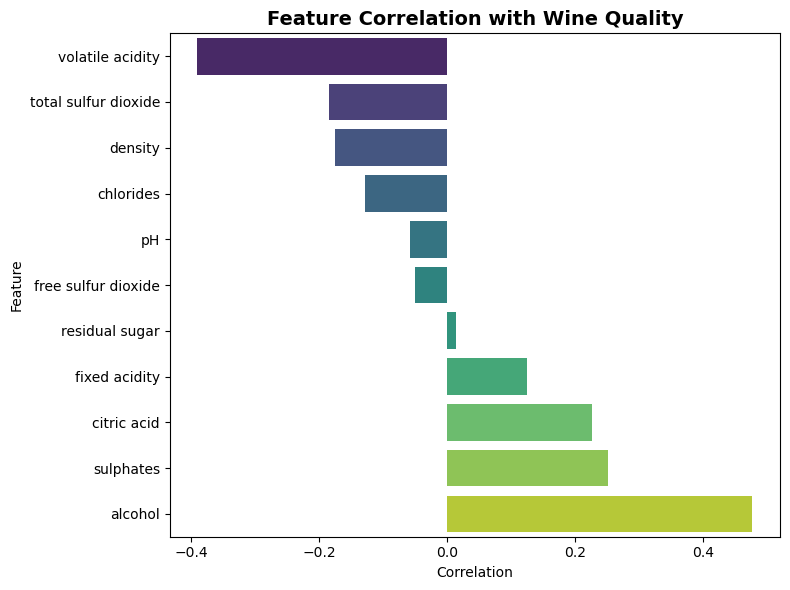

In [23]:
corr = data.corr(numeric_only=True)['quality'].drop('quality').sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr.values,
    y=corr.index,
    hue=corr.index,        # assign hue explicitly
    palette="viridis",
    dodge=False,
    legend=False           # hide legend (since y already labels categories)
)
plt.title("Feature Correlation with Wine Quality", fontsize=14, fontweight='bold')
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [24]:
data = data.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Average',
                                    5 : 'Average',
                                    4 : 'Poor',
                                    3 : 'Poor',
        }
                }
)

In [25]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average


In [26]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol',]
joblib.dump(features, "feature_columns.pkl")

['feature_columns.pkl']

## Pre Processing

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [28]:
data = data.drop(['chlorides', 'pH', 'residual sugar', 'free sulfur dioxide'], axis = 1)

In [29]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [30]:
print("Features used:", X.columns.tolist())

Features used: ['fixed acidity', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


## Split / Testing / Training

In [31]:
X_features = X.copy()

X_train_data, X_test_data, y_train, y_test = train_test_split(
    X_features, data['quality'], test_size=0.2, random_state=42, stratify=data['quality']
)

## X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 101)

## Scaling for Logistic Regression

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_data)
X_test_scaled = scaler.transform(X_test_data) 

# Fit the regression model on the scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 
                 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                 'total sulfur dioxide', 'density', 'pH', 'sulphates']

print("Your input columns:", data.columns.tolist())
print("Scaler expects:", feature_names)


Your input columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality']
Scaler expects: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']


In [34]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
}

In [35]:

results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name} ---")
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_data)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_data)
        metrics["ROC_AUC"] = roc_auc_score(
            y_test,
            y_prob,
            multi_class='ovr',
            average='macro'
        )

    results[model_name] = metrics
    print(metrics)


Training Logistic Regression ---
{'Accuracy': 0.634375, 'Precision': 0.7298544337606837, 'Recall': 0.634375, 'F1': 0.6688456632653061, 'ROC_AUC': 0.6411720634211971}

Training Random Forest Classifier ---


C:\Users\OLA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\OLA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


{'Accuracy': 0.825, 'Precision': 0.6806249999999999, 'Recall': 0.825, 'F1': 0.7458904109589041, 'ROC_AUC': 0.6391691968728083}


C:\Users\OLA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\OLA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

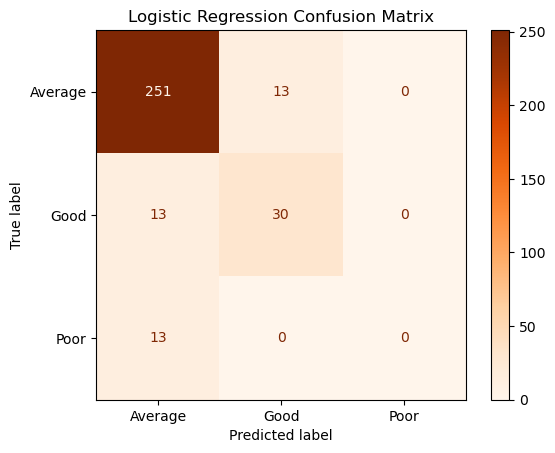

In [37]:
# Logistic Regression confusion matrix

y_pred_lr = model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr, display_labels=np.unique(y_test)).plot(cmap='Oranges')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

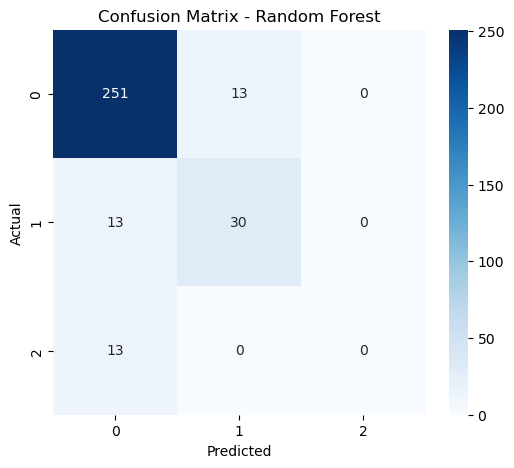

In [38]:
#Confusion Matric for random forest

rf_pred = models['Random Forest Classifier'].predict(X_test_scaled)
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Feature Importance

In [39]:
# Logistic Regression feature importance
logistic_model = models['Logistic Regression']
coef_data = pd.Series(logistic_model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Logistic Regression Feature Importance:\n", coef_data)

# Random Forest feature importance
rf_model = models['Random Forest Classifier']
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:\n", rf_importance)

Logistic Regression Feature Importance:
 total sulfur dioxide    0.357373
density                 0.034978
fixed acidity          -0.012368
volatile acidity       -0.091538
citric acid            -0.093693
sulphates              -0.132742
alcohol                -0.278175
dtype: float64

Random Forest Feature Importance:
 alcohol                 0.179763
volatile acidity        0.157419
sulphates               0.150056
density                 0.134774
total sulfur dioxide    0.133381
fixed acidity           0.123379
citric acid             0.121227
dtype: float64


In [40]:
feature_names=[
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates'
]

# Keep original DataFrame for column names
feature_names = X_train_data.columns  # X_train must be a DataFrame, NOT X_train_scaled

# Scale features for Logistic Regression
X_train_scaled = scaler.fit_transform(X_train_data)  # NumPy array for model
X_test_scaled = scaler.transform(X_test_data)


In [41]:
## Using logistic model to compare randomforest feature importance

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train_scaled, y_train)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_data, y_train)
                 
y_pred = logistic_model.predict(X_test_scaled)

#Extract and display feature coefficients
importance = logistic_model.coef_[0]
feature_names = X_train_data.columns

feat_importance_data = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': importance
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature importance (Coefficients from Logistic Model):")
print(feat_importance_data)



Feature importance (Coefficients from Logistic Model):
                Feature  Coefficient
4               density     2.173912
3  total sulfur dioxide     0.009754
0         fixed acidity    -0.017411
2           citric acid    -0.019782
1      volatile acidity    -0.027087
6               alcohol    -0.275254
5             sulphates    -0.826972


C:\Users\OLA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OLA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


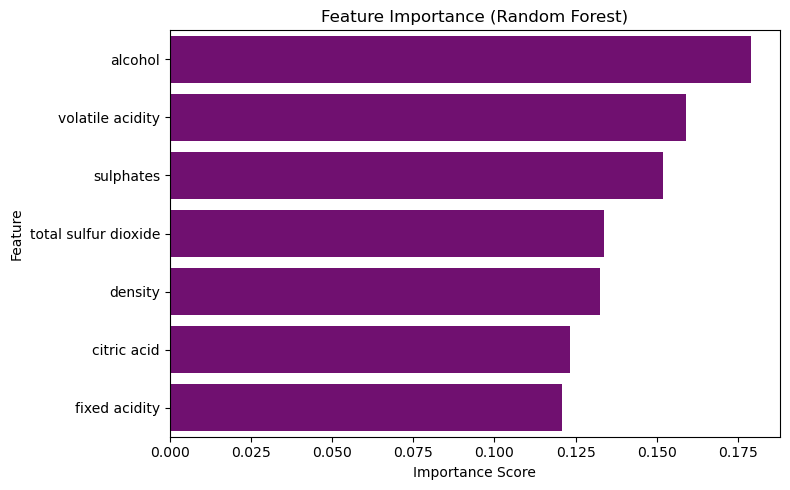

In [48]:
# Random Forest feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train_data.columns).sort_values(ascending=False)



plt.figure(figsize=(8,5))
sns.barplot(
    x=feature_importance.values,
    y=feature_importance.index,
    color='purple'
)

plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [43]:
results_data = pd.DataFrame(results).T  # transpose for readability
print("\nSummary of Metrics for all models:")
print(results_data)


Summary of Metrics for all models:
                          Accuracy  Precision    Recall        F1   ROC_AUC
Logistic Regression       0.634375   0.729854  0.634375  0.668846  0.641172
Random Forest Classifier  0.825000   0.680625  0.825000  0.745890  0.639169


In [44]:
feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates']
joblib.dump(feature_columns, "feature_columns.pkl")

['feature_columns.pkl']

In [45]:
joblib.dump(model, "wine_prediction_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [46]:
import pkg_resources
libs = ["pandas", "numpy", "seaborn", "matplotlib", "scikit-learn", "joblib", "math"]
with open("requirements.txt", "w") as f:
    for lib in libs:
        try:
            version = pkg_resources.get_distribution(lib).version
            f.write(f"{lib}=={version}\n")
        except pkg_resources.DistributionNotFound:
            print(f"{lib} is not installed in this environmnet.")

math is not installed in this environmnet.


In [47]:
!type requirements.txt

pandas==2.2.2
numpy==1.26.4
seaborn==0.13.2
matplotlib==3.8.4
scikit-learn==1.4.2
joblib==1.4.2
